# Objective:
## The classification goal is to predict the likelihood of a liability customer buying personal loans.

###  Import required libraries

In [3]:
# import pandas
import pandas as pd

#import numerical python
import numpy as np

#Import required functions from Sklearn package
from sklearn import model_selection
#import Logistic Regression model
from sklearn.linear_model import LogisticRegression
#import Gaussian naive Bayes model
from sklearn.naive_bayes import GaussianNB
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
#import zscore
from scipy.stats import zscore
#import library to split train and test data
from sklearn.model_selection import train_test_split
# to calculate accuracy measures and confusion matrix
from sklearn import metrics

#importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs within Jupyter notebook
%matplotlib inline 

# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Imort Bank_Personal_Loan_Modelling data from provided csv into Dataframe

In [47]:
loanData_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [48]:
# view Data type of each attribute
loanData_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [49]:
loanData_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [50]:
#Dropping ID and ZipCode columns as they do not have any significance data
loanData_df.drop('ID',axis=1,inplace=True)
loanData_df.drop('ZIP Code',axis=1,inplace=True)

In [51]:
loanData_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [52]:
# Going through the data, we can see few values in Experience column are nagative numbers which seems to be a data error.
loanData_df[loanData_df['Experience']<0].head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [53]:
#Replacing these values in Experience column with their absolute values 
loanData_df.Experience = loanData_df.Experience.abs()

#Checking for any negative values after updating Experience with their absolute values
loanData_df[loanData_df['Experience']<0].head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [54]:
# Replace the numbers in categorical variables with the actual Education in the Education col
loanData_df['Education'] = loanData_df['Education'].replace({1: 'UG', 2: 'PG', 3: 'Prof'})
loanData_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,UG,0,0,1,0,0,0
1,45,19,34,3,1.5,UG,0,0,1,0,0,0
2,39,15,11,1,1.0,UG,0,0,0,0,0,0
3,35,9,100,1,2.7,PG,0,0,0,0,0,0
4,35,8,45,4,1.0,PG,0,0,0,0,0,1


In [55]:
# Convert categorical variable 'Education' into dummy/indicator variables. 
loanData_df = pd.get_dummies(loanData_df, columns=['Education'])
loanData_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_PG,Education_Prof,Education_UG
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0,0


In [56]:
# Analyse the data using descriptive statistics
loanData_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0


On verifying the mean and median,we can see data is mostly right skewed

In [57]:
#Verify the Target Column distribution of Personal Loan customers by grouping the column by its values
loanData_df.groupby(["Personal Loan"]).count()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_PG,Education_Prof,Education_UG
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


From the result, the models developed using this data can predict the cases where PL wont be accepted better than the other case. 

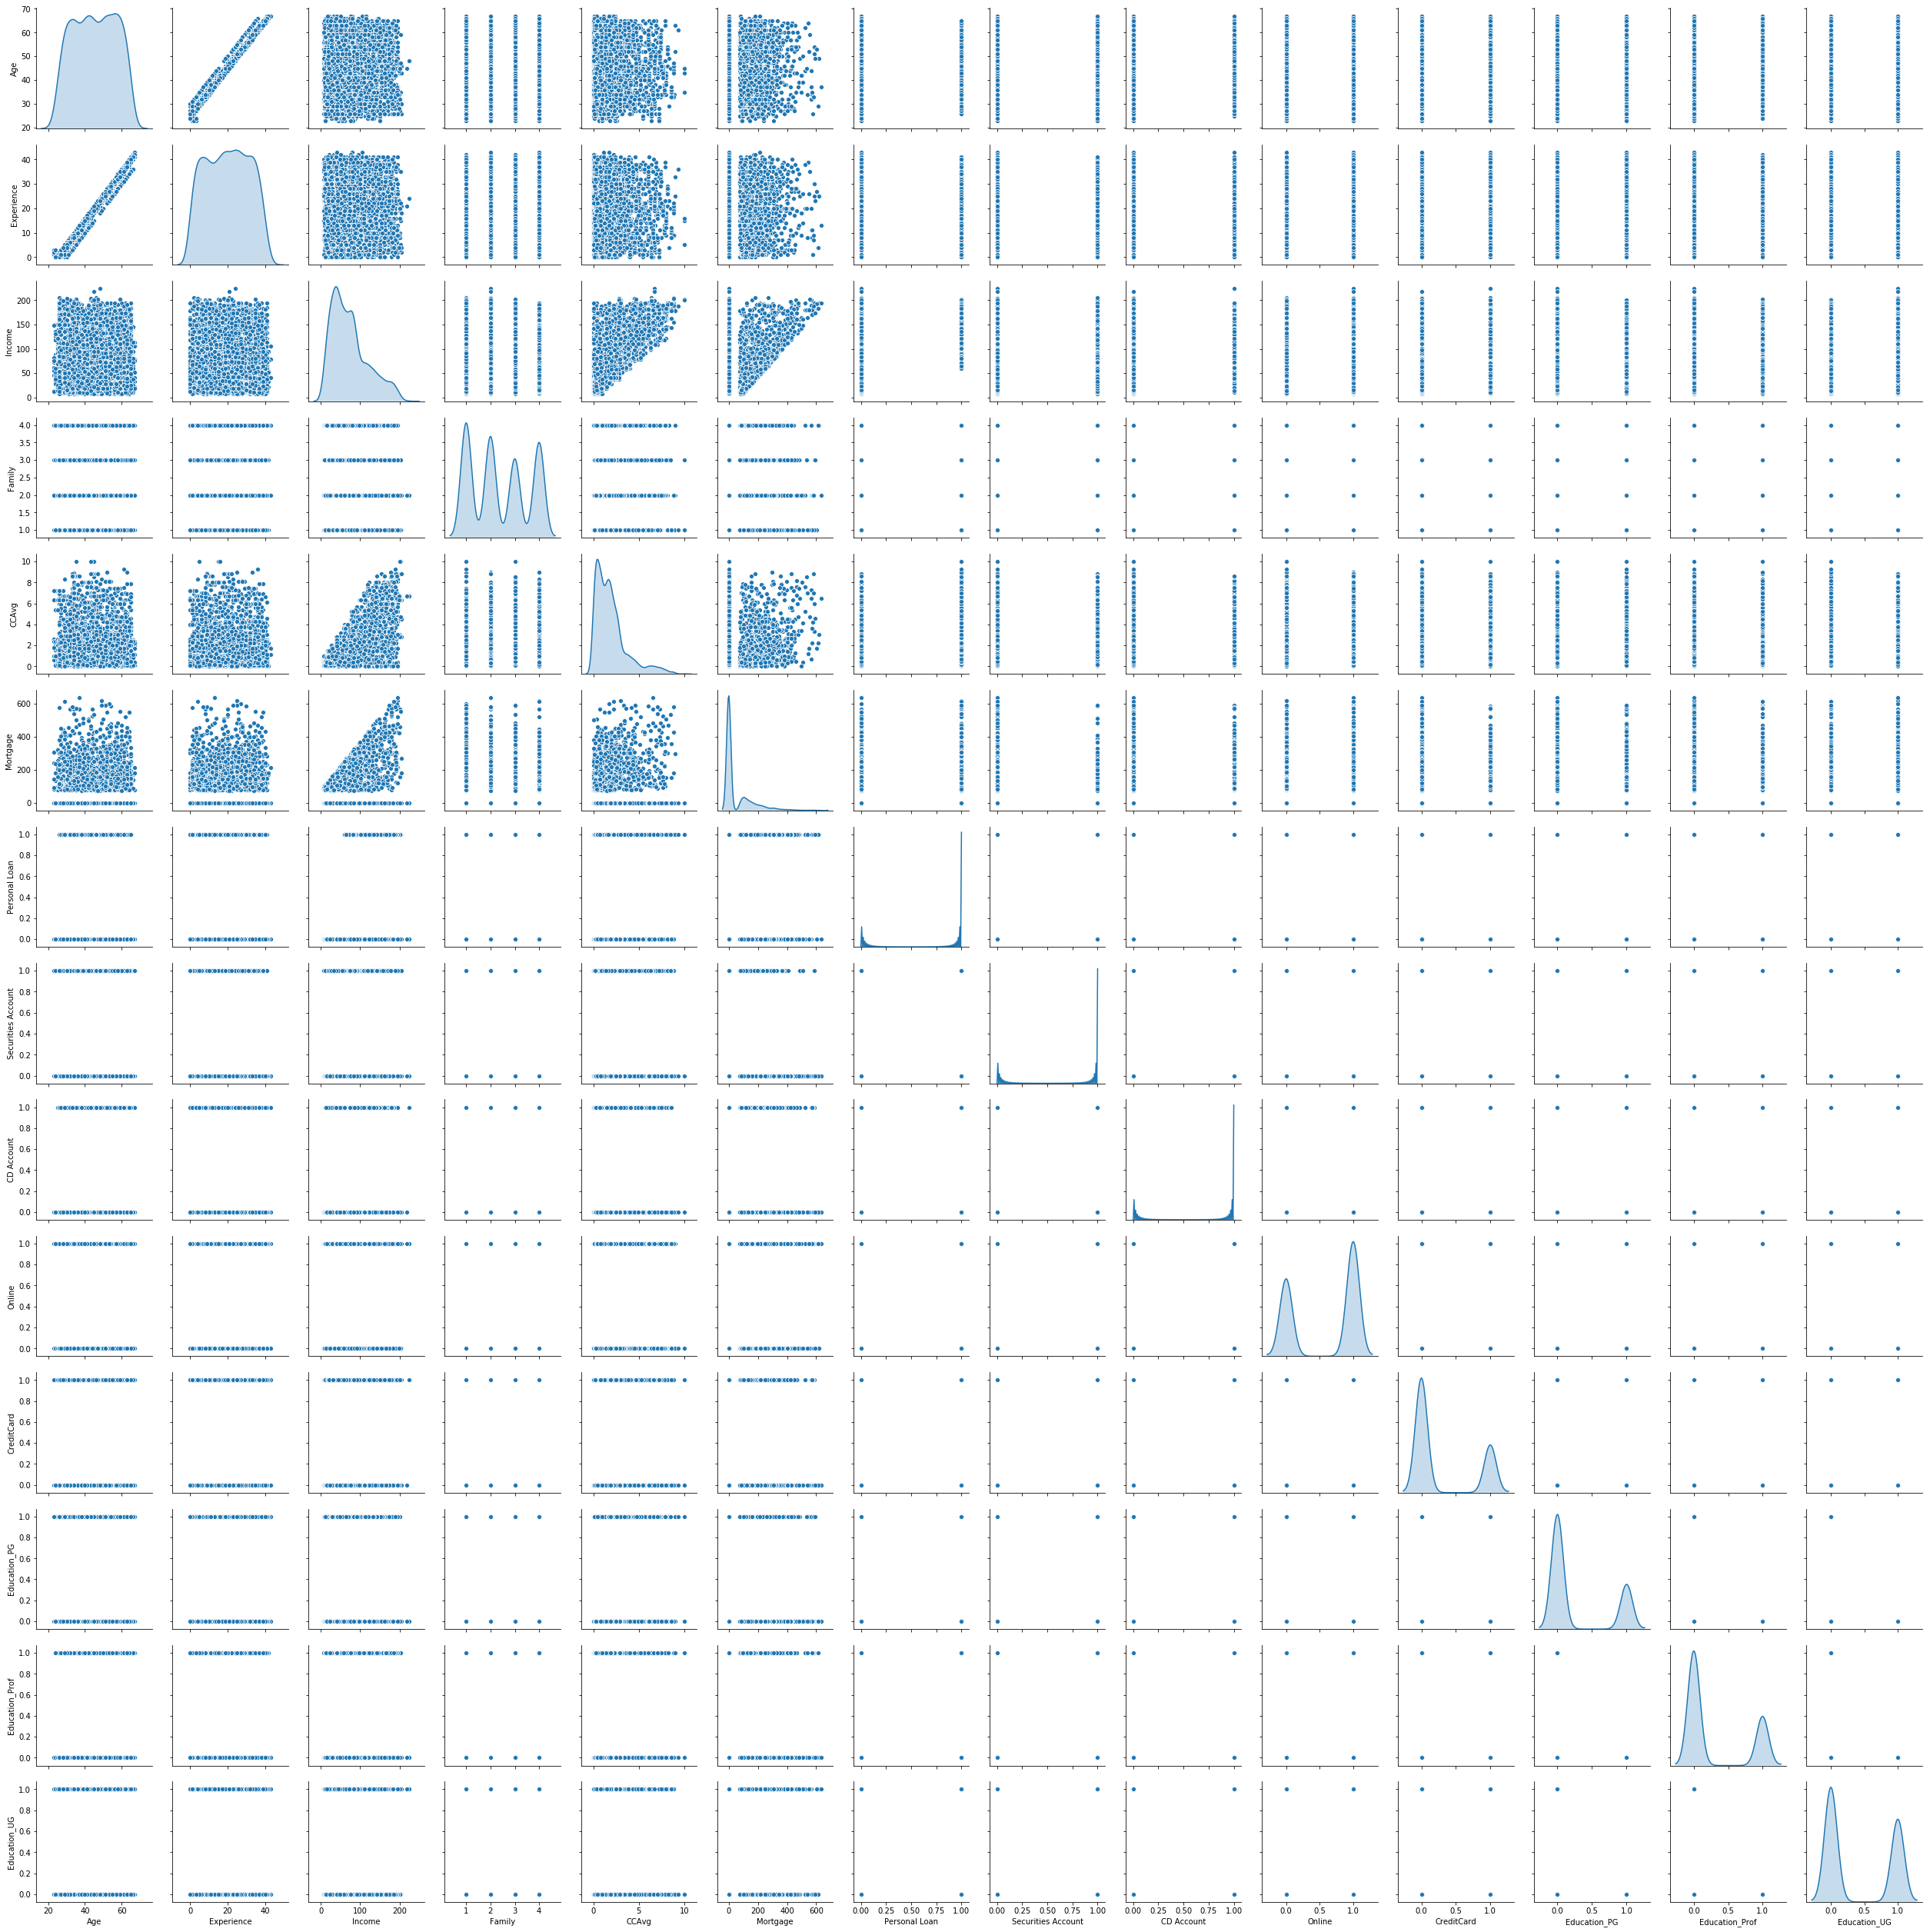

In [41]:
#Plotting the pairplot to understand the data ditribution
sns.pairplot(loanData_df, diag_kind='kde')

#### Looking at the above plot, data looks to be evenly distributed in most of the cases.

### LogisticRegression

Loading & Splitting the data 

In [62]:
# Copying all the predictor variables into X dataframe. Dropping 'Personal Loan' columns as it is dependent variable
Xlr = loanData_df.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
ylr = loanData_df[['Personal Loan']]

In [70]:
#Splitting the data in 70:30 ratio for train and test respectively
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(Xlr, ylr, test_size=0.30, random_state=1)

In [71]:
Log_Reg_model = LogisticRegression()
Log_Reg_model.fit(Xlr_train, ylr_train.values.ravel())
ylr_predict = Log_Reg_model.predict(Xlr_test)

In [72]:
Log_Reg_model.score(Xlr_test, ylr_test)

0.9573333333333334

 We can achieve 95.73% accuracy using this Logistic regression model based on given dataset.

In [88]:
print(metrics.classification_report(ylr_test, ylr_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.64      0.75       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.82      0.86      1500
weighted avg       0.96      0.96      0.95      1500



In [73]:
# Calculate the confusion matrix
print(metrics.confusion_matrix(ylr_test, ylr_predict))

[[1341   10]
 [  54   95]]


### Naive _Bayesian

Loading & Splitting the data 

In [79]:
# Copying all the predictor variables into X dataframe. Dropping 'Personal Loan' columns as it is dependent variable
Xnb = loanData_df.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
ynb = loanData_df[['Personal Loan']]

In [82]:
# Split X and y into training and test set in 70:30 ratio
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(Xnb, ynb, test_size=0.30, random_state=1)

In [84]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.values.ravel())
ynb_predict = NB_model.predict(X_test)

In [107]:
NB_model.score(Xnb_test, ynb_test)

0.8866666666666667

We can achieve 88.67% accuracy using this Naive Bayesian model based on given dataset.

In [89]:
print(metrics.classification_report(ynb_test, ynb_predict))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.45      0.58      0.51       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.90      0.89      0.89      1500



In [90]:
# Calculate the confusion matrix
print(metrics.confusion_matrix(ynb_test, ynb_predict))

[[1243  108]
 [  62   87]]


### K Nearest Neighbours

Loading & Splitting the data 

In [122]:
# Declare NNH neighbours
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [123]:
# Copying all the predictor variables into X dataframe. Dropping 'Personal Loan' columns as it is dependent variable
Xknn = loanData_df.drop('Personal Loan', axis=1)

# Copy the 'Personal Loan' column alone into the y dataframe. This is the dependent variable
yknn = loanData_df[['Personal Loan']]

In [124]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

Xknn_z = Xknn.apply(zscore)  # convert all attributes to Z scale 

Xknn_z.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_PG,Education_Prof,Education_UG
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.001421e-16,1.939449e-16,7.850609e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-2.122302e-16,-3.148592e-17,-6.365575e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.764019e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-6.549654e-01,-8.495664e-01
25%,-9.019702e-01,-8.879059e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-6.549654e-01,-8.495664e-01
50%,-2.952359e-02,-1.179249e-02,-2.123482e-01,-3.454321e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.245376e-01,-6.549654e-01,-8.495664e-01
75%,8.429230e-01,8.643209e-01,5.263146e-01,5.259909e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.601185e+00,1.526798e+00,1.177071e+00
max,1.889859e+00,2.003268e+00,3.263712e+00,1.397414e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.601185e+00,1.526798e+00,1.177071e+00


In [125]:
# Split X and y into training and test set in 70:30 ratio

Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(Xknn_z, yknn, test_size=0.30, random_state=1)

In [126]:
# Call Nearest Neighbour algorithm

NNH.fit(Xknn_train, yknn_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [127]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

yknn_predict = NNH.predict(Xknn_test)
NNH.score(Xknn_test, yknn_test)

0.956

We can achieve 95.6% accuracy using this KNN model based on given dataset.

In [105]:
print(metrics.classification_report(yknn_test, yknn_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1351
           1       0.94      0.60      0.73       149

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.95      0.80      0.85      1500
weighted avg       0.96      0.96      0.95      1500



In [106]:
# Calculate the confusion matrix
print(metrics.confusion_matrix(yknn_test, yknn_predict))

[[1345    6]
 [  60   89]]


## CONCLUSION

## Based on the above, Logistic Regression is best model.
## Logistic Regression has a better score of 95.73% compared to 95.6% in case of KNN.
## Also, f1 score for Logostic Regression is 0.75 for positive scenario over 0.73 for KNN. f1 score for negative scenario however remains same for both models.